# Title: Loan Prediction using Machine learning pipeline

# Table of Content

- Define Problem Statement
- Collection and importation of dataset
- Data Accessing
- Data Cleaning
- Data Exploration and Analysis
- Feature Engineering 
- Feature Selection 
- Building of model
- Model Evaluation and Testing

# 1.0 Define Problem Statement

- The dataset consist of informations about the applicant who requested for a loan, and this informations determine if a applicant is eligible for loan or not. The aim of this project is to analysis the taining dataset and build a model that is capable of predicting from the future dataset(test dataset) weather loan will be granted to the applicant or not base on his/her informations 

# 2.0 Collection and importation of dataset
- A train and test dataset was collected from kaggle.com... and I will import the dataset

# 2.1 Importation of dataset

In [70]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']= 12,8

In [71]:
# importing the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Data Accessing

In [72]:
# print the first 5 row of the train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# print the last 5 row of the test_df
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [74]:
# print the summary of the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# From the result above
- The dataset consist of 13 columns and 613 rows  
- 12 of the columns are dependent features (Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History, Property_Area)  and 1 is independent feature(Loan_Status)

- 8 of the columns are of object dtype ( Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area,  Loan_Status), 4 are float Dtype( CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History) and 1 is int Dtype (ApplicantIncome).

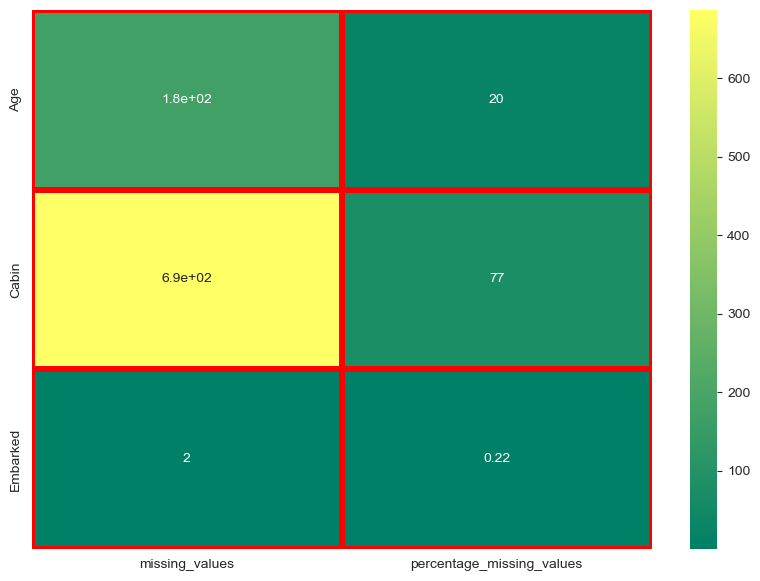

In [40]:
missing_values=train_df.isna().sum()
percentage_missing_values = round(missing_values/train_df.shape[0] * 100, 2)
Total_missing_values=pd.concat([missing_values, percentage_missing_values], axis=1, keys=["missing_values", "percentage_missing_values"])
i=Total_missing_values[Total_missing_values["missing_values"]>0]

plt.figure(figsize=(10,7))
sns.heatmap(data=i, annot=True, cmap="summer", linewidths=2.9, linecolor="red")
plt.show()

- We have about 8 columns with missing values. I will deal with them later on in the project

In [41]:
# check for duplicate values
train_df.duplicated().sum()

0

# Data Cleaning

In [42]:
# fill the missing values in gender column with mode
gender_mode=train_df.Gender.mode()[0]
train_df.Gender.fillna(gender_mode, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Gender'

In [43]:
# fill the missing values in married column with mode
hh=train_df.Married.mode()[0]
train_df.Married.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Married'

In [44]:
# fill the missing values in dependent column with mode
hh=train_df.Dependents.mode()[0]
train_df.Dependents.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Dependents'

In [45]:
# fill the missing values in Self_Employed column with mode
hh=train_df.Self_Employed.mode()[0]
train_df.Self_Employed.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Self_Employed'

In [46]:
# fill the missing values in Self_Employed column with mode
hh=round(train_df.LoanAmount.mean(), 2)
train_df.LoanAmount.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'LoanAmount'

In [47]:
hh=train_df.Loan_Amount_Term.mode()[0]
train_df.Loan_Amount_Term.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Loan_Amount_Term'

In [48]:
hh=train_df.Credit_History.mode()[0]
train_df.Credit_History.fillna(hh, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Credit_History'

# Data Exploration and Analysis

- Data Exploration is the process of visualizing the information in the dataset inorder to understand the pattern and characteristics of the data

# 3.1 Univariate Analysis

In [49]:
# define a function to  plot a barplot for object dtype univariate analysis
def barplot(feature):
    sns.barplot(data=train_df, x=train_df[feature].value_counts().index, y=train_df[feature].value_counts(), 
                palette=["#304D63", "#ED8975"]).set_title(feature)
    plt.show()

In [50]:
# barplot for Gender
barplot("Gender")

KeyError: 'Gender'

# The plot above shows that:

- There are 489(~80.0%) total number of Male who applied for the Load.
- And  122(~20.0%) total number of Female applied for the Load.

In [51]:
# barplot for Married
barplot("Married")

KeyError: 'Married'

# The plot above show that

- 398(~65.1%) total Number of people who applied for the Load are Married
- 213 total(34.9%) Number of people who applied for the Load are Single 

In [52]:
barplot("Dependents")

KeyError: 'Dependents'

# The plot above show that:
- 345(~57.6%) total Number of people who applied for the Load has No Dependents
- 102(~17.0%) total Number of the people who applied for the Load has  1 Dependents
- 101(~16.9%) total Number of the people who applied for the Load has 2 Dependents
- 51(~8.5%) total Number of the people who applied for the Load has more than 2 Dependents

In [53]:
barplot("Education")

KeyError: 'Education'

# The plot above show that:

- 480(~78.2%) total Number of people who applied for the Load are Graduate
- 134(~21.8%) total Number of people who applied for the Load are Not Graduate


In [54]:
barplot("Self_Employed")

KeyError: 'Self_Employed'

# The plot above show that:
- 500(~85.9%) total number of people who applied for the Load are Self_Employed
- 82(~14.1%) total number of people who applied for the Load are not Self_Employed

In [55]:
barplot("Property_Area")

KeyError: 'Property_Area'

# The plot above show that:
- 233(~38.0%) total number of people who applied for the Load has a property in semiurban area

- 202(~32.9%) total number of people who applied for the Load has a property in urban area

- 179(~29.1%) total number of people who applied for the Load has a property in Rural area

In [56]:
barplot("Loan_Status")

KeyError: 'Loan_Status'

The plot above show that:
- The total number of 422(68.7%) Load was Granted
- The total number of 192(31.3%) Load was decline


# Bivariate Analysis

In [57]:
def stack_plot(feature):   
    YES=train_df[train_df["Loan_Status"]=="Y"][feature].value_counts()
    NO=train_df[train_df["Loan_Status"]=="N"][feature].value_counts()
    info = pd.DataFrame([YES, NO], index=["YES", "NO"])
    info.plot(kind="bar", stacked=True,figsize =(12,5))
    

In [58]:
stack_plot("Gender")

KeyError: 'Loan_Status'

from the plot above:
- 69.3% of  the  male who applied for the load were granted
- 61.4% of the female that applied for the load were granted


In [59]:
stack_plot("Married")

KeyError: 'Loan_Status'

- 71.6% of married applicant were granted the load
- 62.9% of not married applicant were granted the load

In [60]:
stack_plot("Dependents")

KeyError: 'Loan_Status'

- 68.9% of applicant with no dependent were granted the load
- 64.7% of applicant with 1 dependent were grnted the load
- 75% of applicant with 2 dependent were granted the load
- 64.7% of applicant with more than 2 dependent were granted the load

In [61]:
stack_plot("Education")

KeyError: 'Loan_Status'

- 70.8% of Grduate who applied for the load were granted
- 61.2% of not Grduate applicant were given the load

In [62]:
stack_plot("Self_Employed")

KeyError: 'Loan_Status'

- 68.6% of not self_employed were granted the load
- 68.3% of applicant who are self_employed were given the load

In [63]:
stack_plot("Property_Area")

KeyError: 'Loan_Status'

- 76.8% of applicant who has property in semiurban area were granted the load
- 65.8% of applicant who has property in urban area were granted the load
- 61.5% of applicant who has property in Rural area were granted the load

In [64]:
facet =sns.FacetGrid(train_df,hue="Loan_Status",aspect=4)
facet.map(sns.kdeplot, "ApplicantIncome",shade=True )
#facet.set(xlim=(0, train_df["ApplicantIncome"].max()))
facet.add_legend()
plt.xlim(1,3000)

KeyError: 'Loan_Status'

In [65]:
train_df["ApplicantIncome"].max()

KeyError: 'ApplicantIncome'

The above plot show the relationship between Loan_status and the ApplicantIncome. From the plot it can be see that applicant with lower imcome were not granted while applicant with high income were granted

# MultiVariate analysis

In [66]:
pd.pivot_table(train_df, values=("Loan_Status"), columns=("Property_Area"), index="Dependents", aggfunc="count")

KeyError: 'Loan_Status'

The table above show  number of applicants(with their dependent and property area) who applied for the load

- It can be say that applicants from Semiurban area with no dependent has highest application for the load
- And applicants from urban area with more than 3 dependent has lowest application for the load

In [67]:
analysis2=pd.pivot_table(train_df, values=("Loan_Status"), columns=("Property_Area"), index="Education", aggfunc="count")
analysis2.plot(kind="bar")
plt.show()
analysis2

KeyError: 'Loan_Status'

In [68]:
analysis3=pd.pivot_table(train_df, values=("Loan_Status"), columns=("Married"), index="Education", aggfunc="count")
display(analysis3)

analysis3.plot(kind="bar")
plt.show()

KeyError: 'Loan_Status'

In [69]:
a=train_df.query("Education=='Graduate' and Married=='No' & Self_Employed=='No'")["Loan_Status"].value_counts()
b=train_df.query("Education=='Graduate' and Married=='Yes' & Self_Employed=='No'")["Loan_Status"].value_counts()
c=train_df.query("Education=='Not Graduate' and Married=='No' & Self_Employed=='No'")["Loan_Status"].value_counts()
d=train_df.query("Education=='Not Graduate' and Married=='Yes' & Self_Employed=='Yes'")["Loan_Status"].value_counts()
analysis4=pd.DataFrame([a,b,c,d], index=["index1","index2","index3","index4"])
display(analysis4)
analysis4.plot(kind="bar", stacked=True) 
plt.show()

UndefinedVariableError: name 'Education' is not defined

- index 1: indicate the load_status of applicant who  is a Graduate, Not Self_Employed and Not Married
- index 2: indicate the load_status of applicant who is a Graduate, Not Self_Employed and has Married
- index 3: indicate the load_status of applicant who  is not a Graduate, Not Self_Employed and Not Married
- index 4: indicate the load_status of applicant who  is not a Graduate, Self_Employed and has Married
# From the analysis above, it can be say that applicant who is a Graduate, Not Self_Employed and has Married have the high probabilty of getting the load